In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from keras.layers import Dense, LSTM
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = False
INCLUDE_ADA = False

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = False
INCLUDE_1MIN_DATA = True
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_1min'])


Debug crypto_BTC_1min derived dataframe:


(17113, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu

### Create the labels set (`y`)  from the “midpoint price” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Select which crypto order book data file to analyze
crypto_sel_df = crypto_ob_df_dict["crypto_BTC_1min"]

In [8]:
# Confirm all numerical data
crypto_sel_df.dtypes

midpoint                                 float64
spread                                   float64
buys                                     float64
sells                                    float64
bids_distance_0                          float64
                                          ...   
asks_limit_quantity_14                   float64
asks_limit_cum_quantity_14               float64
asks_limit_notional_14                   float64
bids_asks_imbalance_limit_notional_14    float64
asks_limit_cum_notional_14               float64
Length: 199, dtype: object

In [9]:
# Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
if 'Signal' in crypto_sel_df.columns:
    crypto_sel_df["Signal"] = 0.0
else:
    crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        

# If the midpoint price increases, set Signal to +1, else if it decreases, set to -1
crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) >= crypto_sel_df['midpoint']), 'Signal'] = 1
crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) < crypto_sel_df['midpoint']), 'Signal'] = -1

# drop the last row (don't know if the next row midpoint went up or down)
crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)

# Review the DataFrame
display(crypto_sel_df.shape)
display(crypto_sel_df.head(n=10))
display(crypto_sel_df.tail(n=10))

(17112, 200)

,midpoint,Signal,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit

,midpoint,Signal,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit

In [10]:
# Separate the data into labels and features

# Separate the y variable, the labels
y_srs = crypto_sel_df['Signal']

# Separate the X variable, the features
X_df = crypto_sel_df.drop(columns='Signal')

In [11]:
# Review the y variable Series
print("Target set to be used for ML models")
display(type(y_srs))
display(y_srs)

Target set to be used for ML models


pandas.core.series.Series

system_time
2021-04-07 11:33:41.122161+00:00    1.0
2021-04-07 11:34:41.122161+00:00    1.0
2021-04-07 11:35:41.122161+00:00   -1.0
2021-04-07 11:36:41.122161+00:00   -1.0
2021-04-07 11:37:41.122161+00:00    1.0
                                   ... 
2021-04-19 09:49:00.386544+00:00   -1.0
2021-04-19 09:50:00.386544+00:00    1.0
2021-04-19 09:51:00.386544+00:00   -1.0
2021-04-19 09:52:00.386544+00:00   -1.0
2021-04-19 09:53:00.386544+00:00    1.0
Name: Signal, Length: 17112, dtype: float64

In [12]:
# Review the X variable DataFrame
print("Feature set DataFrame be used for ML models")
display(X_df.shape)
display(X_df)

Feature set DataFrame be used for ML models


(17112, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu

### Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [13]:
# Check the balance of our target values
print("# of loan_status values that = 1 (midpoint price increased) and = -1 (midpoint price decreased)")
display(y_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = -1 (midpoint price decreased)


 1.0    8873
-1.0    8239
Name: Signal, dtype: int64

### Split the data into training and testing datasets

In [14]:
# Split the data using 
train_index = int(X_df.shape[0] * 0.75) - 1
X_train_df = X_df.iloc[:train_index]
y_train_srs = y_srs.iloc[:train_index]
X_test_df = X_df.iloc[train_index:]
y_test_srs = y_srs.iloc[train_index:]
#X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)

In [15]:
# Data checkpoint
print("# of loan_status values that = 1 (midpoint price increased) and = -1 (midpoint price decreased) in the Training Set")
display(y_train_srs.value_counts())
print("# of loan_status values that = 1 (midpoint price increased) and = -1 (loan decreased) in the Target/Test Set")
display(y_test_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = -1 (midpoint price decreased) in the Training Set


 1.0    6687
-1.0    6146
Name: Signal, dtype: int64

# of loan_status values that = 1 (midpoint price increased) and = -1 (loan decreased) in the Target/Test Set


 1.0    2186
-1.0    2093
Name: Signal, dtype: int64

### Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
standard_scaler_inst = StandardScaler()

# Fit the scaler to the features training dataset
X_train_scaler = standard_scaler_inst.fit(X_train_df)

# Fit the scaler to the features training dataset
X_train_scaled_npa = X_train_scaler.transform(X_train_df)
X_test_scaled_npa = X_train_scaler.transform(X_test_df)

In [17]:
# Data checkpoint
display(X_train_scaled_npa.shape)
display(X_test_scaled_npa.shape)

(12833, 199)

(4279, 199)

In [18]:
# Convert back to dataframe (to make it easier to drop feature sets as part of evaluating different model permuations below)
X_train_scaled_df = pd.DataFrame(X_train_scaled_npa, columns = X_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled_npa, columns = X_df.columns)

In [19]:
# Data checkpoint
display(X_train_scaled_df.shape)
display(X_test_scaled_df.shape)

(12833, 199)

(4279, 199)

## Compile and Evaluate a LTSM Model Using a Neural Network

In [20]:
# Create the Sequential model instance
model = Sequential()

In [21]:
# Add neural network attributes
model.add(LSTM(10, input_shape=(X_train_scaled_df.shape[1], 1), return_sequences=False, stateful=False))
model.add(Dense(1, activation='sigmoid'))

### Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [22]:
# Compile the LTSM model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Fit the model using 50 epochs and the training data
model_fit = model.fit(X_train_scaled_df, y_train_srs, epochs=50)

Epoch 1/50
402/402 [==============================] - 12s 26ms/step - loss: 0.2466 - accuracy: 0.0086
Epoch 2/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1742 - accuracy: 0.0000e+00
Epoch 3/50
402/402 [==============================] - 10s 26ms/step - loss: 0.1659 - accuracy: 0.0000e+00
Epoch 4/50
402/402 [==============================] - 10s 26ms/step - loss: 0.1575 - accuracy: 0.0000e+00
Epoch 5/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1568 - accuracy: 0.0000e+00
Epoch 6/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1552 - accuracy: 0.0000e+00
Epoch 7/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1563 - accuracy: 0.0000e+00
Epoch 8/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1874 - accuracy: 0.0000e+00
Epoch 9/50
402/402 [==============================] - 10s 25ms/step - loss: 0.1768 - accuracy: 0.0000e+00
Epoch 10/50
402/402 [=============================

In [24]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, nmodel_accuracy =  model.evaluate(X_test_scaled_df,y_test_srs,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {nmodel_accuracy}")

134/134 - 1s - loss: 0.0951 - accuracy: 0.0000e+00 - 1s/epoch - 9ms/step
Loss: 0.09506376087665558, Accuracy: 0.0


<AxesSubplot:>

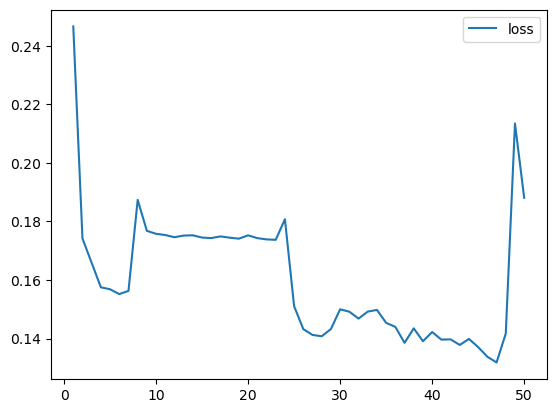

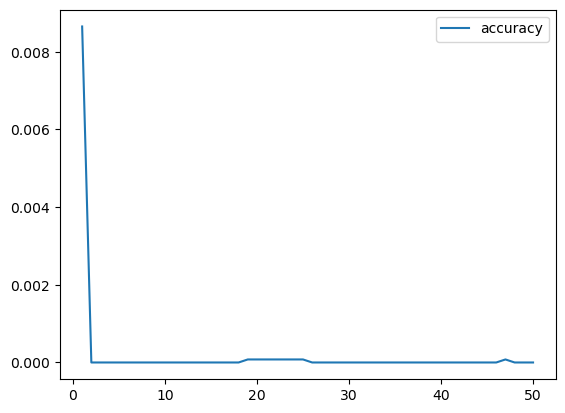

In [25]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model_fit.history, index=range(1, len(model_fit.history["loss"]) + 1))

# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")